#이진분류(binary classification)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
diabetes= pd.read_csv('diabetes.csv')
diabetes.shape

(768, 9)

In [5]:
df= diabetes.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe().T
#  실제 상황에서 info()를 보고 결측치 없다고 하고 describe를 보면 컬럼에 이상한 것들이 있다
#  혈압이 0이거나 말이 안되는 값들은 결측치가 아니라고 하더라도 이상치이기 때문에 삭제해야 더 성능을 높힐 수 있다.


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
# 타겟값은 outcome
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

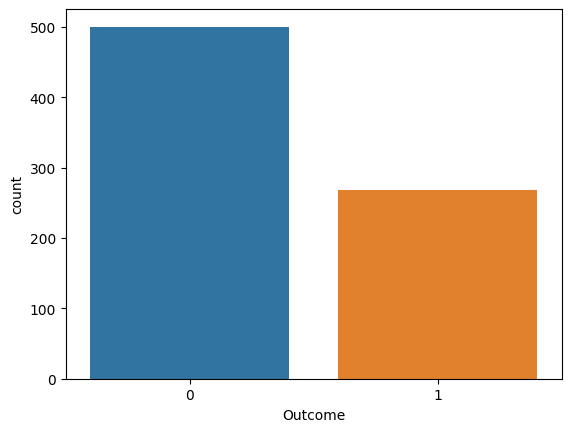

In [10]:
sns.countplot(data= df, x= 'Outcome')

In [12]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
x= df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y= df['Outcome']


In [16]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [18]:
idx= int(len(x)*0.8)
idx

614

In [19]:
x_train = x.iloc[:idx, :]
x_test = x.iloc[idx:, :]

y_train = y[:idx]
y_test = y[idx:]

In [20]:
x_train.shape, y_test.shape

((614, 8), (154,))

In [21]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [22]:
# scaling을 해야되는데 안해도 되나?
# 일단 바로 학습을 해본다


In [23]:
from sklearn. neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(x_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0])

In [25]:
y_test

614    1
615    0
616    0
617    0
618    1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 154, dtype: int64

In [27]:
# value는 뭐지?
# value를 빼고 해볼게요

In [28]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)


In [34]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print_metrics(y_test, y_pred)
acc= accuracy_score(y_test, y_pred)
re = recall_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('정확도:',acc)
print('재현율', np.around(re,4))
print('정밀도:', np.around(pr,4))
print('f1:',np.around(f1,4))

정확도: 0.7012987012987013
재현율 0.5455
정밀도: 0.5882
f1: 0.566


In [35]:
# 이제부터 튜닝시작
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)


KNeighborsClassifier()

In [50]:
scores = []
for k in range(3,200):
  KNeighborsClassifier(n_neighbors=k)
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  acc= accuracy_score(y_test, y_pred)
  scores.append(acc)




In [51]:
scores


[0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012

In [52]:
%%time
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors' : list(range(3,200)),
               'algorithm': ['ball_tree', 'kd_tree', 'brute']}
clf = KNeighborsClassifier()
grid= GridSearchCV(clf,grid_params, cv= 5)
grid.fit(x_train, y_train)

CPU times: user 54.9 s, sys: 250 ms, total: 55.1 s
Wall time: 41.5 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, 32, ...]})

In [53]:
print('best parameter:',grid.best_params_)
print('best score:', grid.best_score_)

best parameter: {'algorithm': 'ball_tree', 'n_neighbors': 28}
best score: 0.7492469678795148


In [57]:
# 0인 부분 평균으로 채우기

df=df.replace(0,df.mean())

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,4.400782,2.984162,1.000000,2.000000,3.845052,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200000,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078000,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.576145,0.310515,0.348958,0.348958,0.348958,1.00000,1.00
